In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_excel('Software_Vuln_Data.xlsx', sheet_name ='vuln') # Reading data 

In [3]:
data.describe()

,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,69909.000000,69909.000000,46458.000000,69909.000000,10965.000000,69909.000000,49820.000000
mean,80771.576092,2.894949,1512.361875,36.457366,1.763338,4.271057,5.998314
std,74274.334047,0.888893,3124.608964,167.254555,2.007894,1.474804,1.219130
min,5001.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,38173.000000,2.000000,123.000000,4.000000,1.000000,3.500000,5.300000
50%,38670.000000,3.000000,443.000000,6.000000,1.000000,3.900000,5.800000
75%,86763.000000,3.000000,443.000000,17.000000,2.000000,4.700000,6.700000
max,373156.000000,5.000000,65000.000000,2809.000000,29.000000,10.000000,10.000000


In [4]:
print(data)

          masked Ip                 Network Tracking Method  \
0      lab_2_IP9036  Global Default Network          QAGENT   
1      lab_2_IP9036  Global Default Network          QAGENT   
2      lab_2_IP9036  Global Default Network          QAGENT   
3      lab_2_IP9036  Global Default Network          QAGENT   
4      lab_2_IP9036  Global Default Network          QAGENT   
...             ...                     ...             ...   
69904     lab_2_IP2  Global Default Network              IP   
69905     lab_2_IP2  Global Default Network              IP   
69906     lab_2_IP2  Global Default Network              IP   
69907     lab_2_IP2  Global Default Network              IP   
69908     lab_2_IP1  Global Default Network              IP   

                                                      OS  \
0                                   Ubuntu Linux 16.04.4   
1                                   Ubuntu Linux 16.04.4   
2                                   Ubuntu Linux 16.04.4   
3  

In [5]:
data.shape


(69909, 39)

# Handling the missing Values 

In [6]:
data_null=data.isnull().sum()
data_null.sort_values(ascending = False)

Associated Malware    69715
Exploitability        60207
Times Reopened        58944
Last Reopened         58944
First Reopened        58944
Date Last Fixed       53268
Bugtraq ID            53177
Vendor Reference      50879
OS CPE                48356
CVE ID                44803
SSL                   40641
Protocol              23451
Port                  23451
CVSS3 Temporal        20089
CVSS3 Base            20089
CVSS3                 20089
OS                     1237
Impact                  500
CVSS Temporal             0
Threat                    0
Solution                  0
PCI Vuln                  0
Category                  0
CVSS Environment          0
masked Ip                 0
CVSS Base                 0
CVSS                      0
Network                   0
Times Detected            0
Last Detected             0
First Detected            0
Severity                  0
Type                      0
Vuln Status               0
Title                     0
QID                 

In [7]:
##Checking null percentage

In [8]:
null_percentage = data.isnull().sum()/len(data)*100
null_percentage.sort_values(ascending = False)

Associated Malware    99.722496
Exploitability        86.121959
Times Reopened        84.315324
Last Reopened         84.315324
First Reopened        84.315324
Date Last Fixed       76.196198
Bugtraq ID            76.066029
Vendor Reference      72.778898
OS CPE                69.169921
CVE ID                64.087600
SSL                   58.134146
Protocol              33.545037
Port                  33.545037
CVSS3 Temporal        28.735928
CVSS3 Base            28.735928
CVSS3                 28.735928
OS                     1.769443
Impact                 0.715215
CVSS Temporal          0.000000
Threat                 0.000000
Solution               0.000000
PCI Vuln               0.000000
Category               0.000000
CVSS Environment       0.000000
masked Ip              0.000000
CVSS Base              0.000000
CVSS                   0.000000
Network                0.000000
Times Detected         0.000000
Last Detected          0.000000
First Detected         0.000000
Severity

In [9]:
data.nunique()

masked Ip              9022
Network                   1
Tracking Method           2
OS                      269
IP Status                 1
QID                    1178
Title                  1178
Vuln Status               4
Type                      1
Severity                  5
Port                    258
Protocol                  2
SSL                       1
First Detected        25925
Last Detected         17135
Times Detected          685
Date Last Fixed        6594
First Reopened         4875
Last Reopened          4557
Times Reopened           23
CVE ID                  837
Vendor Reference        900
Bugtraq ID              369
CVSS                     74
CVSS Base                90
CVSS Temporal           190
CVSS Environment          1
CVSS3                    61
CVSS3 Base              122
CVSS3 Temporal          150
Threat                 1126
Impact                  715
Solution               1156
Exploitability          160
Associated Malware        7
PCI Vuln            

In [86]:
data['OS'].nunique() # We have lot of unique values for 'OS'.

270

In [11]:
data['OS'].fillna('Unknown', inplace=True)
data['OS'].isnull().sum()
# we have filled the 'OS' null values with 'Unknown' 

0

In [12]:
data['Vuln Status'].describe()

count      69909
unique         4
top       Active
freq       56989
Name: Vuln Status, dtype: object

In [13]:
#mean_cvss3=data['CVSS3'].mean()
#mean_cvss3

In [14]:
#data['CVSS3'].fillna(mean_cvss3,inplace=True)

In [15]:
data['CVSS3'].isnull().sum()

20089

In [16]:
data['CVSS3'].describe()

count    49820.000000
mean         5.998314
std          1.219130
min          0.000000
25%          5.300000
50%          5.800000
75%          6.700000
max         10.000000
Name: CVSS3, dtype: float64

In [17]:
data['CVSS'].describe()

count    69909.000000
mean         4.271057
std          1.474804
min          0.000000
25%          3.500000
50%          3.900000
75%          4.700000
max         10.000000
Name: CVSS, dtype: float64

### We can see difference between CVSS and CVSS3 scores. From the 'describe' function it is clear that CVSS3  generates slighty higher score then CVSS


<AxesSubplot:>

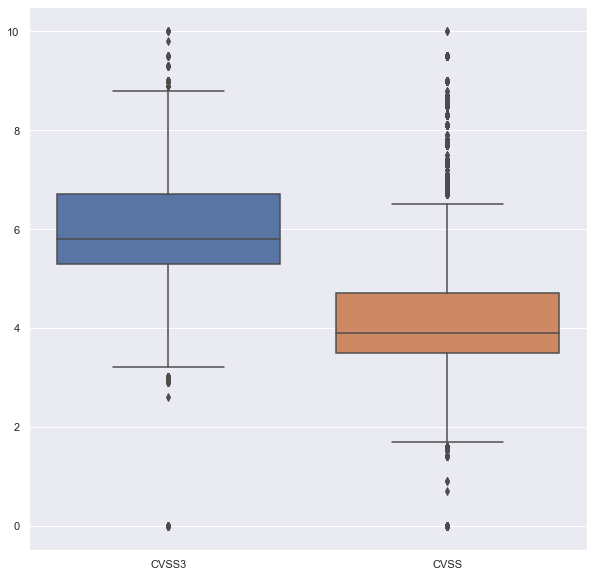

In [18]:
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(10, 10)})
sns.boxplot(data=data.loc[:, ['CVSS3', 'CVSS']])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d5bd21d6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5bd21dc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5bd21d400>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5bd239250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5bd2394c0>],
 'means': []}

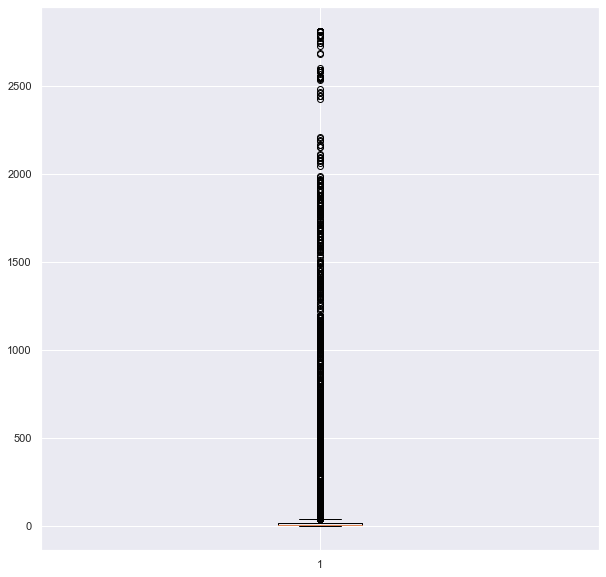

In [19]:
plt.boxplot(data['Times Detected'])

In [20]:
data['Times Detected'].describe()

count    69909.000000
mean        36.457366
std        167.254555
min          1.000000
25%          4.000000
50%          6.000000
75%         17.000000
max       2809.000000
Name: Times Detected, dtype: float64

<AxesSubplot:ylabel='Severity'>

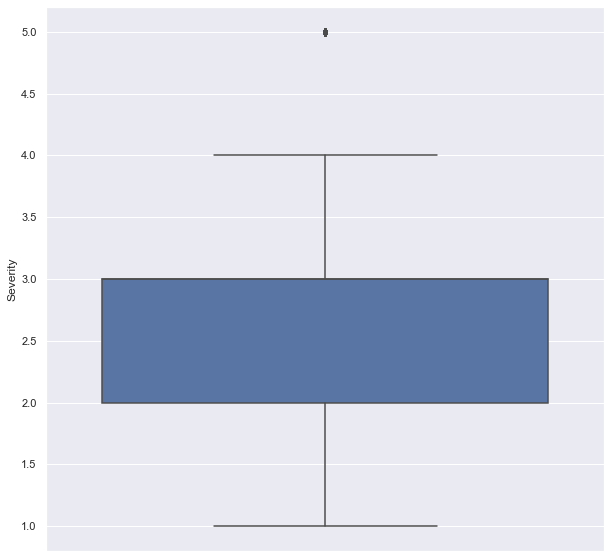

In [21]:
sns.boxplot(y = 'Severity', data = data)

Text(0, 0.5, 'Category')

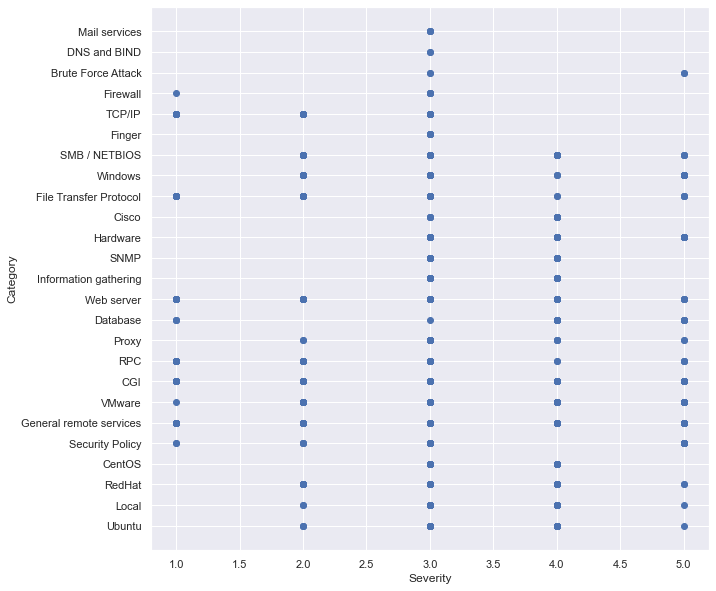

In [22]:
plt.scatter(x=data['Severity'],y=data['Category'])
plt.xlabel('Severity')
plt.ylabel('Category')

<AxesSubplot:xlabel='Vuln Status', ylabel='Count'>

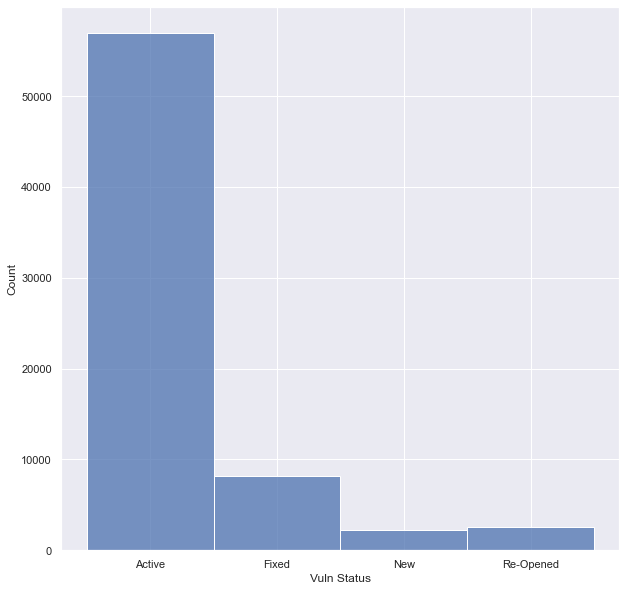

In [23]:
sns.histplot(data = data, x = "Vuln Status")

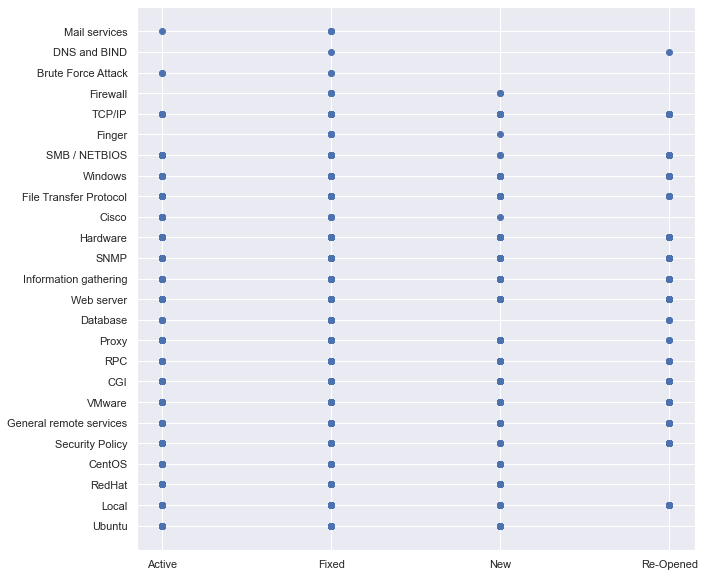

In [24]:
plt.scatter(x=data['Vuln Status'] ,y=data['Category'])

In [25]:
data['Category'].describe()

count                       69909
unique                         25
top       General remote services
freq                        40391
Name: Category, dtype: object

Text(0, 0.5, 'Category')

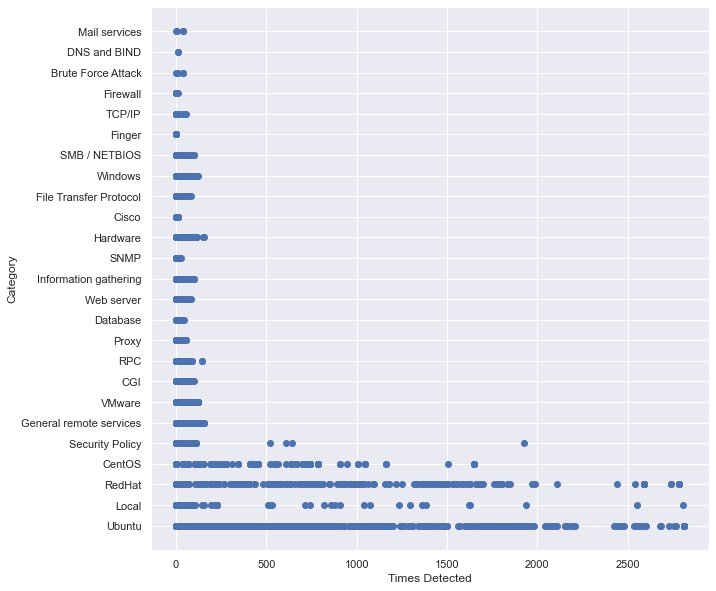

In [26]:
plt.scatter(x=data['Times Detected'],y=data['Category'])
plt.xlabel('Times Detected')
plt.ylabel('Category')

#  From the above observation we notice that Ubuntu,Local,RedHat are the most detected 



Text(0.5, 1.0, 'Severity vs CVSS scores')

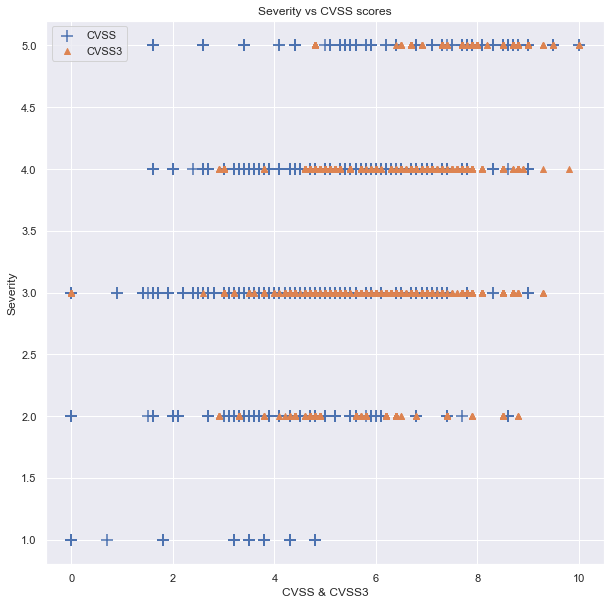

In [27]:
plt.scatter(x=data['CVSS'],y=data['Severity'],marker ="+",s=140,label='CVSS')
plt.scatter(x=data['CVSS3'],y=data['Severity'], marker ="^",label='CVSS3')
plt.legend()
plt.xlabel('CVSS & CVSS3')
plt.ylabel('Severity')
plt.title("Severity vs CVSS scores")

Text(0, 0.5, 'Category')

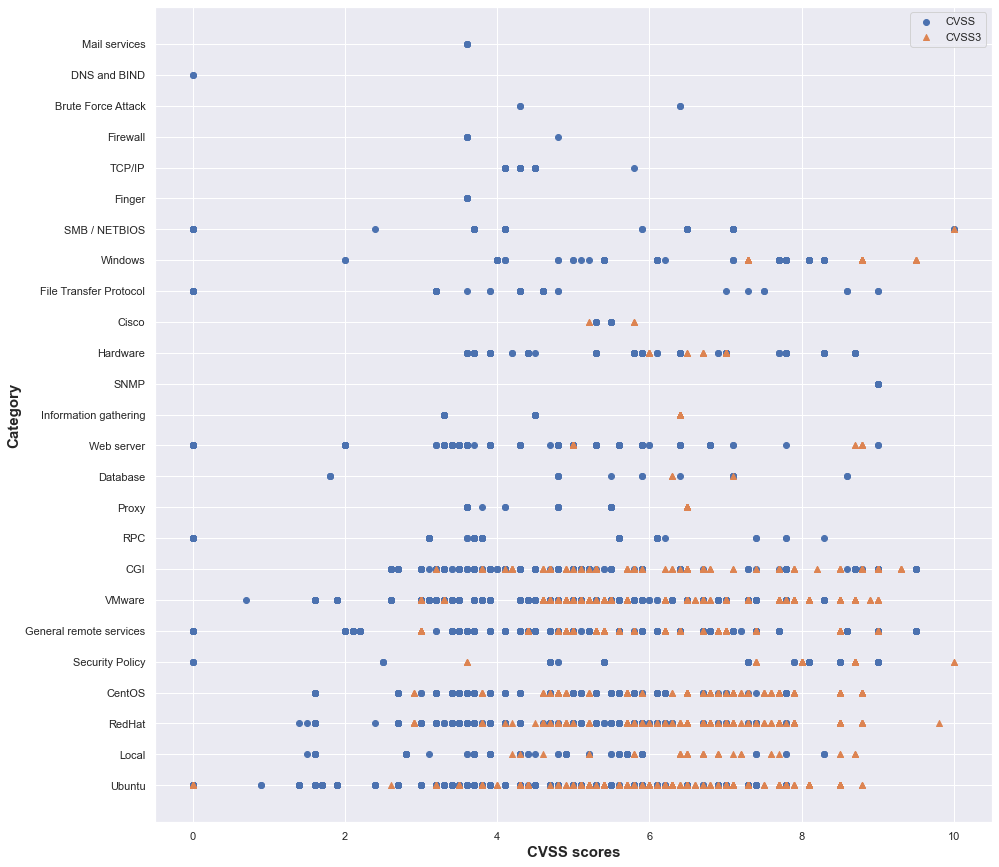

In [28]:
#CVSS scores vs Category 
sns.set_theme(style='darkgrid')
sns.set(rc={"figure.figsize":(15, 15)})
plt.scatter(x=data['CVSS'],y=data['Category'],label='CVSS')
plt.scatter(x=data['CVSS3'],y=data['Category'] ,marker ="^",label='CVSS3')
plt.legend()
plt.xlabel('CVSS scores',fontweight ='bold', fontsize = 15)
plt.ylabel('Category',fontweight ='bold', fontsize = 15)

In [29]:
data['Category'].describe()
## we notice that General remote services are most frequent OS categories. 

count                       69909
unique                         25
top       General remote services
freq                        40391
Name: Category, dtype: object

In [30]:
# Need to find which OS in Ubuntu category and other OS in other categories are havnig more CVSS and and mosty detecte.
# The next task is to drop few features as its simply creating confusion.
# Take the import features and do analysis.


In [31]:
# condition mask
mask = data['Category'] == 'General remote services'
 
# new dataframe with selected rows
data_General_remote_services = pd.DataFrame(data[mask])
 
print(data_General_remote_services)
data_General_remote_services.describe()

          masked Ip                 Network Tracking Method  \
645    lab_2_IP9028  Global Default Network          QAGENT   
2291   lab_2_IP9004  Global Default Network              IP   
2292   lab_2_IP9004  Global Default Network              IP   
2293   lab_2_IP9004  Global Default Network              IP   
2294   lab_2_IP9004  Global Default Network              IP   
...             ...                     ...             ...   
69904     lab_2_IP2  Global Default Network              IP   
69905     lab_2_IP2  Global Default Network              IP   
69906     lab_2_IP2  Global Default Network              IP   
69907     lab_2_IP2  Global Default Network              IP   
69908     lab_2_IP1  Global Default Network              IP   

                                                      OS  \
645                                CentOS Linux 7.8.2003   
2291   VMware vCenter Server Appliance 6.5.0 build 10...   
2292   VMware vCenter Server Appliance 6.5.0 build 10...   
229

,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,40391.000000,40391.000000,39970.000000,40391.000000,6263.000000,40391.000000,27620.000000
mean,38467.149043,2.568221,1508.590743,10.267980,1.582309,4.235691,5.790058
std,564.451525,0.700471,3028.269503,15.046699,1.770681,1.379672,1.031760
min,38003.000000,1.000000,21.000000,1.000000,1.000000,0.000000,3.000000
25%,38170.000000,2.000000,443.000000,4.000000,1.000000,3.600000,5.300000
50%,38259.000000,2.000000,443.000000,5.000000,1.000000,4.300000,5.600000
75%,38657.000000,3.000000,443.000000,10.000000,1.000000,4.700000,6.200000
max,42444.000000,5.000000,65000.000000,156.000000,20.000000,9.500000,9.000000


# Analysis of Ubuntu 

In [32]:
# condition mask
mask = data['Category'] == 'Ubuntu'
 
# new dataframe with selected rows
data_ubuntu = pd.DataFrame(data[mask])
 
print(data_ubuntu)
data_ubuntu.describe()

         masked Ip                 Network Tracking Method  \
0     lab_2_IP9036  Global Default Network          QAGENT   
1     lab_2_IP9036  Global Default Network          QAGENT   
2     lab_2_IP9036  Global Default Network          QAGENT   
3     lab_2_IP9036  Global Default Network          QAGENT   
6     lab_2_IP9036  Global Default Network          QAGENT   
...            ...                     ...             ...   
2146  lab_2_IP9007  Global Default Network          QAGENT   
2147  lab_2_IP9007  Global Default Network          QAGENT   
2148  lab_2_IP9007  Global Default Network          QAGENT   
2149  lab_2_IP9007  Global Default Network          QAGENT   
2157  lab_2_IP9007  Global Default Network          QAGENT   

                        OS                 IP Status     QID  \
0     Ubuntu Linux 16.04.4  host scanned, found vuln  197967   
1     Ubuntu Linux 16.04.4  host scanned, found vuln  197742   
2     Ubuntu Linux 16.04.4  host scanned, found vuln  197688   

,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,1182.000000,1182.000000,0.0,1182.000000,58.000000,1182.000000,1182.000000
mean,197686.505076,3.026227,NaN,757.445008,1.241379,4.469712,6.226819
std,247.118746,0.179818,NaN,714.645240,0.923577,1.423790,1.436361
min,196604.000000,2.000000,NaN,1.000000,1.000000,0.000000,0.000000
25%,197515.500000,3.000000,NaN,199.000000,1.000000,3.400000,5.400000
50%,197742.000000,3.000000,NaN,474.000000,1.000000,4.700000,6.300000
75%,197886.000000,3.000000,NaN,1149.250000,1.000000,5.500000,7.300000
max,198032.000000,5.000000,NaN,2809.000000,6.000000,7.800000,8.800000


In [33]:
 # we only have 5 Unique Opereting system in Ubuntu category.
data_ubuntu['OS'].describe()

count                     1182
unique                       5
top       Ubuntu Linux 16.04.4
freq                       412
Name: OS, dtype: object

In [34]:
#plt.bar(data_ubuntu['OS'], data_ubuntu['Severity'], color ='maroon',width = 0.4)
#plt.xlabel("Severity",fontsize = 20)
#plt.ylabel("Ubuntu O S",fontsize = 20)
#plt.title("OS vs Severity",fontsize = 20)
sns.set_theme(style='darkgrid')
sns.set(rc={"figure.figsize":(10, 10)})

Text(0.5, 0, 'O S')

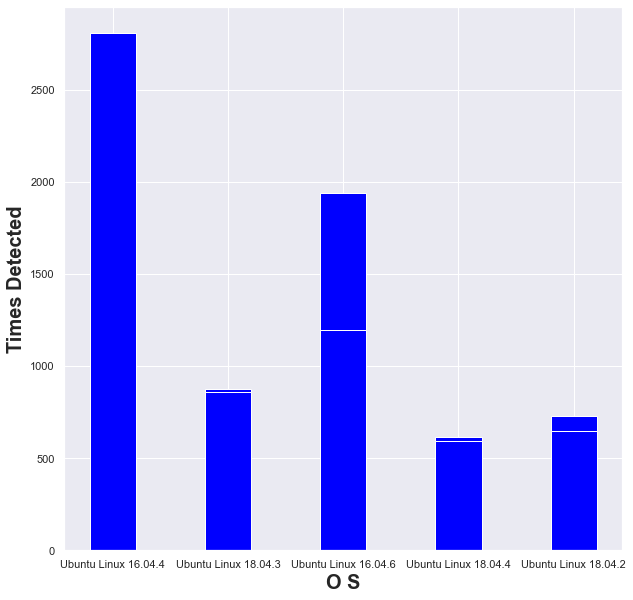

In [35]:
plt.bar(data_ubuntu['OS'], data_ubuntu['Times Detected'], color ='blue',width = 0.4)

plt.ylabel('Times Detected',fontweight ='bold', fontsize = 20)
plt.xlabel('O S',fontweight ='bold', fontsize = 20)


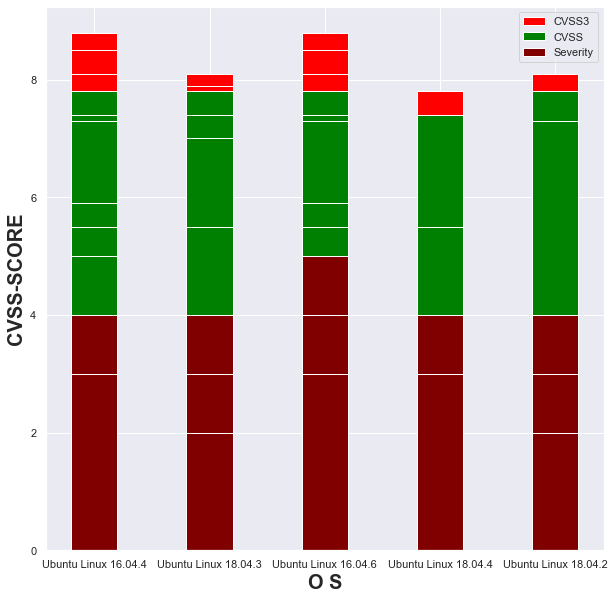

In [36]:
plt.bar(data_ubuntu['OS'], data_ubuntu['CVSS3'], color ='red',width = 0.4, label ='CVSS3')
plt.bar(data_ubuntu['OS'], data_ubuntu['CVSS'], color ='green',width = 0.4, label ='CVSS')
plt.bar(data_ubuntu['OS'], data_ubuntu['Severity'], color ='maroon',width = 0.4, label ='Severity')

plt.xlabel('O S',fontweight ='bold', fontsize = 20)
plt.ylabel('CVSS-SCORE',fontweight ='bold', fontsize = 20)

plt.legend()

## It is Noticed that Ubuntu Linux 16.04.6 is more severe then other Ubuntu OS.

## It is observed that Ubuntu Linux 16.04.4 and 16.04.6  is having High CVSS score and also detected the most 


## Ubuntu Linux 16.04.4

In [37]:
mask = (data_ubuntu['OS'] == 'Ubuntu Linux 16.04.4') & (data_ubuntu['Severity'] >= 3) & (data_ubuntu['CVSS'] >= 7)
 
# new dataframe with selected rows
data_ubuntu_164 = pd.DataFrame(data_ubuntu[mask])
 
print(data_ubuntu_164[['First Detected','Last Detected','Times Detected','Times Reopened','Associated Malware','Exploitability']])

          First Detected       Last Detected  Times Detected  Times Reopened  \
1    2020-01-10 04:46:24 2020-09-23 21:25:25             908             NaN   
24   2020-07-08 03:11:22 2020-09-23 21:25:25             225             NaN   
85   2019-10-29 11:15:08 2020-09-23 21:25:25            1199             NaN   
86   2019-10-16 14:24:59 2020-09-23 21:25:25            1251             NaN   
88   2019-10-06 11:17:58 2020-09-23 21:25:25            1298             NaN   
121  2019-06-13 14:17:40 2020-09-23 21:25:25            1738             NaN   
151  2019-02-15 03:22:46 2020-09-23 21:25:25            2092             NaN   
164  2018-11-17 00:47:13 2020-09-23 21:25:25            2552             1.0   
176  2018-11-17 00:47:13 2020-09-23 21:25:25            2552             1.0   
196  2018-11-17 00:47:13 2020-09-23 21:25:25            2552             1.0   
1464 2020-01-10 04:29:28 2020-09-24 07:55:15             896             NaN   
1511 2020-07-08 08:46:00 2020-09-24 07:5

In [38]:
print(data_ubuntu_164[['Severity','CVSS','CVSS3','Vuln Status','PCI Vuln','CVSS Base','CVSS Temporal']])

      Severity  CVSS  CVSS3 Vuln Status PCI Vuln  \
1            4   7.4    7.8      Active      yes   
24           3   7.4    7.8      Active      yes   
85           3   7.4    7.8      Active      yes   
86           3   7.0    7.9      Active      yes   
88           3   7.4    7.8      Active      yes   
121          3   7.3    8.1      Active      yes   
151          3   7.8    8.1      Active      yes   
164          3   7.8    8.1      Active      yes   
176          3   7.3    7.0      Active      yes   
196          3   7.3    8.1      Active      yes   
1464         4   7.4    7.8      Active      yes   
1511         3   7.4    7.8      Active      yes   
1606         3   7.4    7.8      Active      yes   
1607         3   7.0    7.9      Active      yes   
1609         3   7.4    7.8      Active      yes   
1642         3   7.3    8.1      Active      yes   
1672         3   7.8    8.1      Active      yes   
1685         3   7.8    8.1      Active      yes   
1698        

## Ubuntu Linux 16.04.6

In [39]:
mask = (data_ubuntu['OS'] == 'Ubuntu Linux 16.04.6') & (data_ubuntu['Severity'] >= 3) & (data_ubuntu['CVSS'] >= 7) 
 
# new dataframe with selected rows
data_ubuntu_166 = pd.DataFrame(data_ubuntu[mask])
 
print(data_ubuntu_166[['First Detected','Last Detected','Times Detected','Times Reopened','Associated Malware','Exploitability']])

         First Detected       Last Detected  Times Detected  Times Reopened  \
402 2020-01-10 04:48:25 2020-03-11 08:25:33             235             NaN   
438 2019-10-29 11:32:13 2020-03-11 08:25:33             509             1.0   
439 2019-10-16 14:10:50 2020-03-11 08:25:33             559             1.0   
441 2019-10-06 11:11:08 2020-03-11 08:25:33             588             1.0   
646 2020-08-11 02:40:40 2020-09-24 02:15:46             108             NaN   
672 2020-01-10 04:47:09 2020-02-11 21:46:15             143             NaN   
703 2020-07-08 03:09:50 2020-09-24 02:15:46             229             NaN   
769 2019-10-29 11:00:27 2020-02-11 21:46:15             442             NaN   
771 2019-10-16 14:26:13 2020-02-11 21:46:15             495             NaN   
773 2019-10-06 10:33:27 2020-02-11 21:46:15             545             NaN   
810 2019-06-13 14:29:21 2020-02-11 21:46:15             976             NaN   
840 2019-03-28 02:04:45 2020-02-11 21:46:15         

In [40]:
print(data_ubuntu_166[['Severity','CVSS','CVSS3','Vuln Status','PCI Vuln','CVSS Base','CVSS Temporal']])

     Severity  CVSS  CVSS3 Vuln Status PCI Vuln  \
402         4   7.4    7.8      Active      yes   
438         3   7.4    7.8      Active      yes   
439         3   7.0    7.9      Active      yes   
441         3   7.4    7.8      Active      yes   
646         5   7.4    7.8      Active      yes   
672         4   7.4    7.8       Fixed      yes   
703         3   7.4    7.8      Active      yes   
769         3   7.4    7.8       Fixed      yes   
771         3   7.0    7.9       Fixed      yes   
773         3   7.4    7.8       Fixed      yes   
810         3   7.3    8.1       Fixed      yes   
840         3   7.8    8.1       Fixed      yes   
851         3   7.8    8.1       Fixed      yes   
864         3   7.3    7.0       Fixed      yes   
866         3   7.4    8.5       Fixed      yes   
884         3   7.3    8.1       Fixed      yes   

                            CVSS Base           CVSS Temporal  
402   10 (AV:N/AC:L/Au:N/C:C/I:C/A:C)    7.4 (E:U/RL:OF/RC:C)  
438 

## ----------------------------------------------------------------------------------------------------------------------------------

### Severity == 5

In [41]:
## Checking the OS with severity = 5. In Ubuntu Category

In [42]:
mask = data_ubuntu['Severity'] == 5

data_ubuntu_severity5 = pd.DataFrame(data_ubuntu[mask])

print(data_ubuntu_severity5[['CVSS3','CVSS','Severity','OS','Impact','Threat']])

     CVSS3  CVSS  Severity                    OS  \
646    7.8   7.4         5  Ubuntu Linux 16.04.6   

                                                Impact  \
646   An attacker could possibly use this issue to ...   

                                                Threat  
646    It was discovered that FFmpeg incorrectly ve...  


## ----------------------------------------------------------------------------------------------------------------------------------

### Most Dectected in Ubuntu category

In [43]:
mask = data_ubuntu['CVSS'] >= 9

data_ubuntu_TD = pd.DataFrame(data_ubuntu[mask])

print(data_ubuntu_TD)

Empty DataFrame
Columns: [masked Ip, Network, Tracking Method, OS, IP Status, QID, Title, Vuln Status, Type, Severity, Port, Protocol, SSL, First Detected, Last Detected, Times Detected, Date Last Fixed, First Reopened, Last Reopened, Times Reopened, CVE ID, Vendor Reference, Bugtraq ID, CVSS, CVSS Base, CVSS Temporal, CVSS Environment, CVSS3, CVSS3 Base, CVSS3 Temporal, Threat, Impact, Solution, Exploitability, Associated Malware, PCI Vuln, OS CPE, Category, Non-running Kernel]
Index: []

[0 rows x 39 columns]


# Analysis of Local Category OS

In [44]:
# condition mask
mask = data['Category'] == 'Local'
 
# new dataframe with selected rows
data_local = pd.DataFrame(data[mask])
 
print(data_local)
data_local.describe()

          masked Ip                 Network Tracking Method  \
4      lab_2_IP9036  Global Default Network          QAGENT   
5      lab_2_IP9036  Global Default Network          QAGENT   
293    lab_2_IP9034  Global Default Network          QAGENT   
294    lab_2_IP9034  Global Default Network          QAGENT   
295    lab_2_IP9034  Global Default Network          QAGENT   
...             ...                     ...             ...   
69465    lab_2_IP66  Global Default Network              IP   
69487    lab_2_IP65  Global Default Network              IP   
69488    lab_2_IP65  Global Default Network              IP   
69489    lab_2_IP65  Global Default Network              IP   
69522    lab_2_IP63  Global Default Network              IP   

                                                      OS  \
4                                   Ubuntu Linux 16.04.4   
5                                   Ubuntu Linux 16.04.4   
293                                CentOS Linux 7.7.1908   
294

,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,367.000000,367.000000,9.0,367.000000,71.000000,367.000000,55.000000
mean,148064.583106,3.043597,20545.0,88.869210,1.436620,4.062670,6.641818
std,77352.581089,0.241254,11208.0,310.373729,0.840619,0.836625,0.937232
min,115292.000000,2.000000,5601.0,1.000000,1.000000,1.500000,4.200000
25%,121695.000000,3.000000,5601.0,8.000000,1.000000,3.900000,6.400000
50%,121695.000000,3.000000,28017.0,16.000000,1.000000,3.900000,6.500000
75%,121695.000000,3.000000,28017.0,27.000000,2.000000,3.900000,6.900000
max,373156.000000,5.000000,28017.0,2806.000000,4.000000,8.300000,8.700000


In [45]:
# It is noticed that there are 47 unique OS belonging to Local Category.
data_local['OS'].describe()

count                                                   367
unique                                                   47
top       Ubuntu / Tiny Core Linux / Linux 2.6.x / IBM A...
freq                                                     79
Name: OS, dtype: object

### So we set thrushold value here that all the OS having CVSS over 7(High) and analysis them.

In [46]:
data_local_cvss_7 = data_local.loc[(data_local['CVSS'] > 7)]
print(data_local_cvss_7)
data_local_cvss_7.describe()

          masked Ip                 Network Tracking Method  \
451    lab_2_IP9028  Global Default Network          QAGENT   
5067   lab_2_IP8675  Global Default Network              IP   
6712   lab_2_IP8481  Global Default Network              IP   
6714   lab_2_IP8481  Global Default Network              IP   
6839   lab_2_IP8473  Global Default Network              IP   
6841   lab_2_IP8473  Global Default Network              IP   
11082  lab_2_IP7910  Global Default Network              IP   
22085  lab_2_IP6507  Global Default Network              IP   

                                                      OS  \
451                                CentOS Linux 7.8.2003   
5067                                              Ubuntu   
6712                       VMware ESX 4.1.0 build 260247   
6714                       VMware ESX 4.1.0 build 260247   
6839                       VMware ESX 4.1.0 build 260247   
6841                       VMware ESX 4.1.0 build 260247   
11082      U

,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,8.000000,8.000000,3.0,8.000000,3.000000,8.000000,5.000000
mean,214103.875000,3.625000,5601.0,19.375000,1.666667,7.837500,8.100000
std,130498.074693,0.744024,0.0,10.676242,1.154701,0.417261,0.821584
min,118569.000000,3.000000,5601.0,2.000000,1.000000,7.400000,7.200000
25%,118867.500000,3.000000,5601.0,13.750000,1.000000,7.400000,7.200000
50%,120832.500000,3.500000,5601.0,25.000000,1.000000,7.800000,8.700000
75%,371687.000000,4.000000,5601.0,27.000000,2.000000,8.300000,8.700000
max,371687.000000,5.000000,5601.0,28.000000,3.000000,8.300000,8.700000


Text(0, 0.5, 'O S')

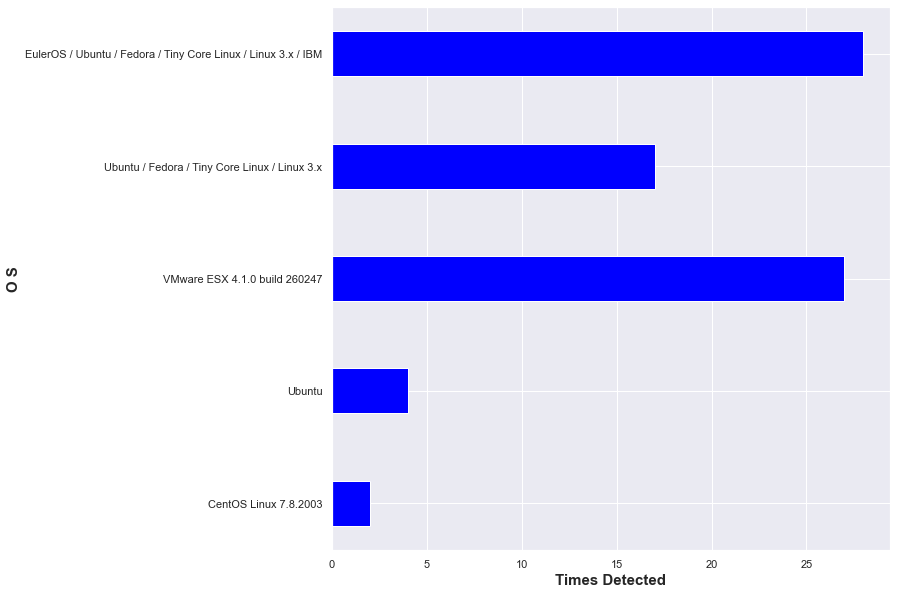

In [47]:
OS=data_local_cvss_7['OS']
Times_Detected=data_local_cvss_7['Times Detected']
plt.barh(OS, Times_Detected, color ='blue',height=0.4)
plt.xlabel('Times Detected',fontweight ='bold', fontsize = 15)
plt.ylabel('O S',fontweight ='bold', fontsize = 15)


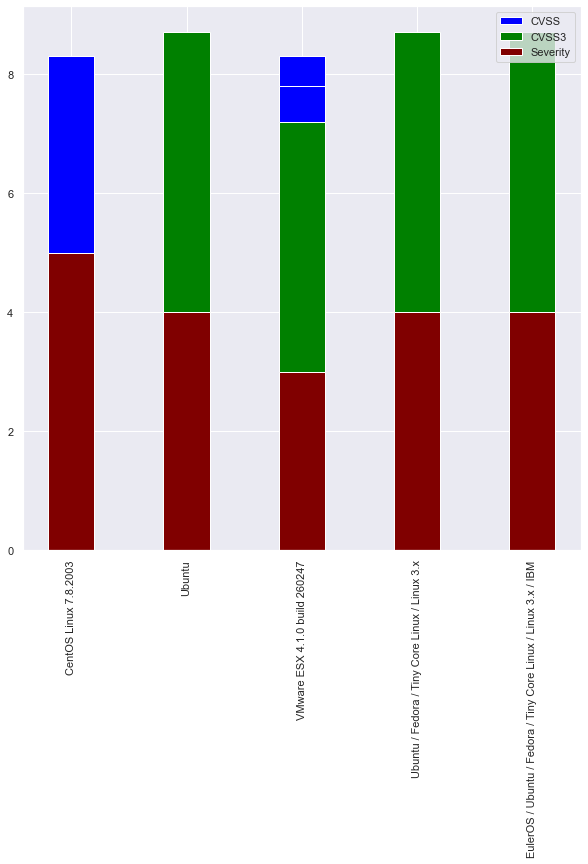

In [48]:

plt.bar(data_local_cvss_7['OS'], data_local_cvss_7['CVSS'], color ='blue',width = 0.4,label='CVSS')
p1=plt.bar(data_local_cvss_7['OS'], data_local_cvss_7['CVSS3'], color ='green',width = 0.4,label='CVSS3')
plt.bar(data_local_cvss_7['OS'], data_local_cvss_7['Severity'], color ='maroon',width = 0.4,label='Severity')
plt.legend()
#sns.set_theme(style='whitegrid')
#y_pos = range(len(data_local_cvss_7['OS']))
plt.xticks(rotation=90)

OS=data_local_cvss_7['OS']
CVSS=data_local_cvss_7['CVSS']
CVSS3=data_local_cvss_7['CVSS3']

#for i in range(len(OS)):
#    plt.text(i,9,CVSS3[i],ha="center",va="bottom")

#ax.bar_label(p1, label_type='center')

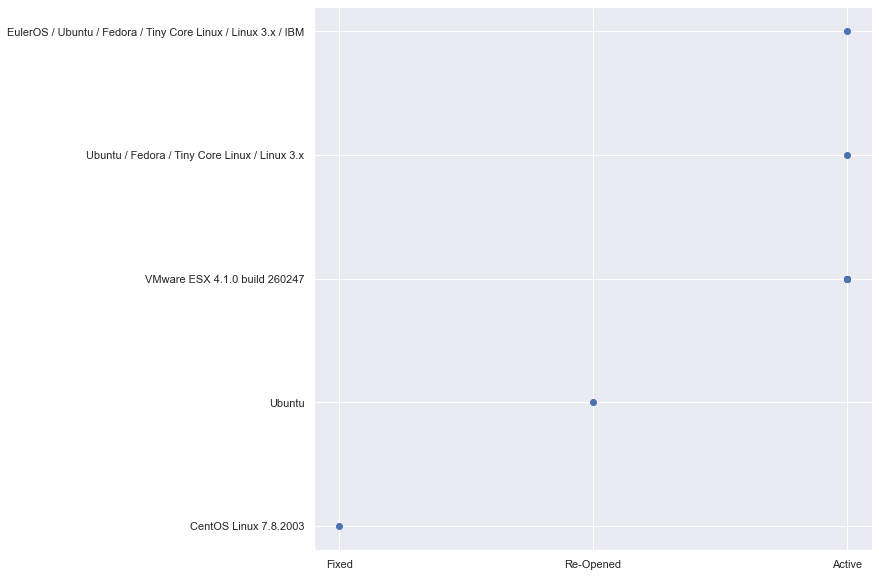

In [49]:
plt.scatter(x=data_local_cvss_7['Vuln Status'] ,y=data_local_cvss_7['OS'])

# Observations:
## 1)All the OS lie in the High CVSS score region.

## 2)EulerOS/ Ubuntu/ has been listed the as most number of vulnerability                   detected and CVSS lieing in the High vulnerability region

### -----------------------------------------------------------------------------------------------------------------------------------------------------

### EulerOS / Ubuntu / Fedora / Tiny Core Linux / Linux 3.x / IBM

In [50]:
mask = (data_local_cvss_7['OS'] == 'EulerOS / Ubuntu / Fedora / Tiny Core Linux / Linux 3.x / IBM') & (data_local_cvss_7['Severity'] >= 3) & (data_local_cvss_7['CVSS'] >= 7) 
 
# new dataframe with selected rows
data_local_1 = pd.DataFrame(data_local_cvss_7[mask])

In [51]:
print(data_local_1[['First Detected','Last Detected','Times Detected','Times Reopened','Associated Malware','Exploitability']])

           First Detected       Last Detected  Times Detected  Times Reopened  \
22085 2019-11-24 05:25:41 2020-09-23 17:54:51              28             NaN   

      Associated Malware Exploitability  
22085                NaN            NaN  


In [52]:
print(data_local_1[['Severity','CVSS','CVSS3','Vuln Status','PCI Vuln','CVSS Base','CVSS Temporal']])

       Severity  CVSS  CVSS3 Vuln Status PCI Vuln  \
22085         4   7.4    8.7      Active      yes   

                             CVSS Base         CVSS Temporal  
22085  10 (AV:N/AC:L/Au:N/C:C/I:C/A:C)  7.4 (E:U/RL:OF/RC:C)  


### Ubuntu / Fedora / Tiny Core Linux / Linux 3.x

In [53]:
mask = (data_local_cvss_7['OS'] == 'Ubuntu / Fedora / Tiny Core Linux / Linux 3.x') & (data_local_cvss_7['Severity'] >= 3) & (data_local_cvss_7['CVSS'] >= 7) 
 
# new dataframe with selected rows
data_local_2 = pd.DataFrame(data_local_cvss_7[mask])

In [54]:
print(data_local_2[['First Detected','Last Detected','Times Detected','Times Reopened','Associated Malware','Exploitability']])

           First Detected       Last Detected  Times Detected  Times Reopened  \
11082 2019-11-24 22:38:02 2020-07-08 09:04:00              17             3.0   

      Associated Malware Exploitability  
11082                NaN            NaN  


In [55]:
print(data_local_2[['Severity','CVSS','CVSS3','Vuln Status','PCI Vuln','CVSS Base','CVSS Temporal']])

       Severity  CVSS  CVSS3 Vuln Status PCI Vuln  \
11082         4   7.4    8.7      Active      yes   

                             CVSS Base         CVSS Temporal  
11082  10 (AV:N/AC:L/Au:N/C:C/I:C/A:C)  7.4 (E:U/RL:OF/RC:C)  


### Ubuntu

In [56]:
mask = (data_local_cvss_7['OS'] == 'Ubuntu') & (data_local_cvss_7['Severity'] >= 3) & (data_local_cvss_7['CVSS'] >= 7) 
 
# new dataframe with selected rows
data_local_3 = pd.DataFrame(data_local_cvss_7[mask])

In [57]:
print(data_local_3[['First Detected','Last Detected','Times Detected','Times Reopened','Associated Malware','Exploitability']])

          First Detected       Last Detected  Times Detected  Times Reopened  \
5067 2020-05-27 02:19:20 2020-07-08 14:04:27               4             1.0   

     Associated Malware Exploitability  
5067                NaN            NaN  


In [58]:
print(data_local_3[['Severity','CVSS','CVSS3','Vuln Status','PCI Vuln','CVSS Base','CVSS Temporal']])

      Severity  CVSS  CVSS3 Vuln Status PCI Vuln  \
5067         4   7.4    8.7   Re-Opened      yes   

                            CVSS Base         CVSS Temporal  
5067  10 (AV:N/AC:L/Au:N/C:C/I:C/A:C)  7.4 (E:U/RL:OF/RC:C)  


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Most detected 

In [59]:
data_local_cvss_7 = data_local.loc[(data_local['Times Detected'] >= 2500)]
print(data_local_cvss_7)
data_local_cvss_7.describe()

         masked Ip                 Network Tracking Method  \
5     lab_2_IP9036  Global Default Network          QAGENT   
1469  lab_2_IP9013  Global Default Network          QAGENT   

                        OS                 IP Status     QID  \
5     Ubuntu Linux 16.04.4  host scanned, found vuln  370248   
1469  Ubuntu Linux 16.04.4  host scanned, found vuln  370248   

                                                  Title Vuln Status  Type  \
5     Ruby Gem nokogiri libxml2 and libxslt Security...      Active  Vuln   
1469  Ruby Gem nokogiri libxml2 and libxslt Security...      Active  Vuln   

      Severity  ...       CVSS3 Temporal  \
5            3  ...  6.5 (E:U/RL:O/RC:C)   
1469         3  ...  6.5 (E:U/RL:O/RC:C)   

                                                 Threat  \
5     Nokogiri is an HTML, XML, SAX, and Reader pars...   
1469  Nokogiri is an HTML, XML, SAX, and Reader pars...   

                                                 Impact  \
5     Successful e

,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,2.0,2.0,0.0,2.000000,2.000000,2.0,2.0
mean,370248.0,3.0,NaN,2677.500000,1.500000,3.7,6.5
std,0.0,0.0,NaN,181.726443,0.707107,0.0,0.0
min,370248.0,3.0,NaN,2549.000000,1.000000,3.7,6.5
25%,370248.0,3.0,NaN,2613.250000,1.250000,3.7,6.5
50%,370248.0,3.0,NaN,2677.500000,1.500000,3.7,6.5
75%,370248.0,3.0,NaN,2741.750000,1.750000,3.7,6.5
max,370248.0,3.0,NaN,2806.000000,2.000000,3.7,6.5


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Severity = 5

In [60]:
data_local_cvss_7 = data_local.loc[(data_local['Severity'] == 5)]
print(data_local_cvss_7)
data_local_cvss_7.describe()

        masked Ip                 Network Tracking Method  \
451  lab_2_IP9028  Global Default Network          QAGENT   

                        OS                 IP Status     QID  \
451  CentOS Linux 7.8.2003  host scanned, found vuln  122698   

                                                 Title Vuln Status  Type  \
451  Bash Command Injection/Remote Code Execution V...       Fixed  Vuln   

     Severity  ...  CVSS3 Temporal  \
451         5  ...             NaN   

                                                Threat  \
451  The GNU Bourne Again shell (Bash) is a shell a...   

                                                Impact  \
451  Successful exploitation allows remote code exe...   

                                              Solution  \
451  GNU bash has patches available at GNU BASH pat...   

                                        Exploitability  \
451  Source: The Exploit-DB_x000D_\nReference:CVE-2...   

                                    Associated Mal

,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,1.0,1.0,0.0,1.0,1.0,1.0,0.0
mean,122698.0,5.0,NaN,2.0,1.0,8.3,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,122698.0,5.0,NaN,2.0,1.0,8.3,NaN
25%,122698.0,5.0,NaN,2.0,1.0,8.3,NaN
50%,122698.0,5.0,NaN,2.0,1.0,8.3,NaN
75%,122698.0,5.0,NaN,2.0,1.0,8.3,NaN
max,122698.0,5.0,NaN,2.0,1.0,8.3,NaN


In [61]:
## We can see that only has severity equal to 5 but its CVSS3 is unknow (Null Value)

In [62]:
data_local_cvss_7_CentOS=data_local_cvss_7.loc[(data_local_cvss_7['OS'] == 'CentOS Linux 7.8.2003')]
data_local_cvss_7_CentOS.describe()

,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,1.0,1.0,0.0,1.0,1.0,1.0,0.0
mean,122698.0,5.0,NaN,2.0,1.0,8.3,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,122698.0,5.0,NaN,2.0,1.0,8.3,NaN
25%,122698.0,5.0,NaN,2.0,1.0,8.3,NaN
50%,122698.0,5.0,NaN,2.0,1.0,8.3,NaN
75%,122698.0,5.0,NaN,2.0,1.0,8.3,NaN
max,122698.0,5.0,NaN,2.0,1.0,8.3,NaN


## ----------------------------------------------------------------------------------------------------------------------------------

# Analysis of RedHat Category OS

In [63]:
# condition mask
mask = data['Category'] == 'RedHat'
 
# new dataframe with selected rows
data_redhat = pd.DataFrame(data[mask])
 
print(data_redhat)
data_redhat.describe()

         masked Ip                 Network Tracking Method  \
206   lab_2_IP9035  Global Default Network          QAGENT   
207   lab_2_IP9035  Global Default Network          QAGENT   
208   lab_2_IP9035  Global Default Network          QAGENT   
209   lab_2_IP9035  Global Default Network          QAGENT   
210   lab_2_IP9035  Global Default Network          QAGENT   
...            ...                     ...             ...   
2264  lab_2_IP9006  Global Default Network          QAGENT   
2265  lab_2_IP9006  Global Default Network          QAGENT   
2266  lab_2_IP9006  Global Default Network          QAGENT   
2267  lab_2_IP9006  Global Default Network          QAGENT   
2268  lab_2_IP9006  Global Default Network          QAGENT   

                                       OS                 IP Status     QID  \
206          Red Hat Enterprise Linux 8.1  host scanned, found vuln  238147   
207          Red Hat Enterprise Linux 8.1  host scanned, found vuln  238053   
208          Red H

,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,654.000000,654.000000,0.0,654.000000,3.000000,654.000000,647.000000
mean,237823.062691,3.412844,NaN,651.974006,1.666667,4.562080,6.798145
std,461.506721,0.702797,NaN,677.371764,1.154701,1.266919,1.339133
min,236763.000000,2.000000,NaN,1.000000,1.000000,1.400000,2.900000
25%,237428.000000,3.000000,NaN,61.000000,1.000000,3.600000,5.900000
50%,237861.000000,4.000000,NaN,406.000000,1.000000,5.000000,6.800000
75%,238232.000000,4.000000,NaN,1320.250000,2.000000,5.500000,7.700000
max,238591.000000,5.000000,NaN,2786.000000,3.000000,7.800000,9.800000


In [64]:
data_redhat['OS'].describe() # We have 6 unique OS in RedHat Category 

count                              654
unique                               6
top       Red Hat Enterprise Linux 8.2
freq                               240
Name: OS, dtype: object

Text(0, 0.5, 'O S')

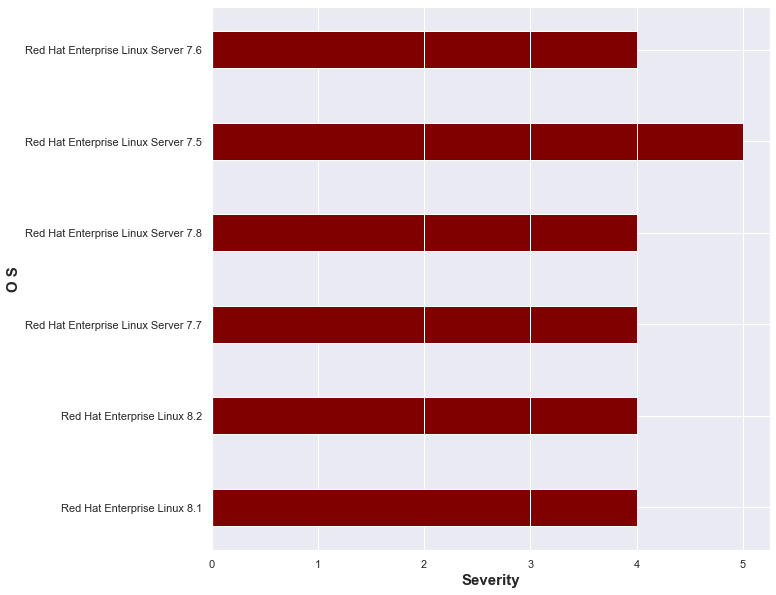

In [65]:
OS=data_redhat['OS']
Severity=data_redhat['Severity']
plt.barh(OS, Severity, color ='maroon',height=0.4)
plt.xlabel("Severity",fontweight ='bold', fontsize = 15)
plt.ylabel("O S",fontweight ='bold', fontsize = 15)


Text(0, 0.5, 'Category')

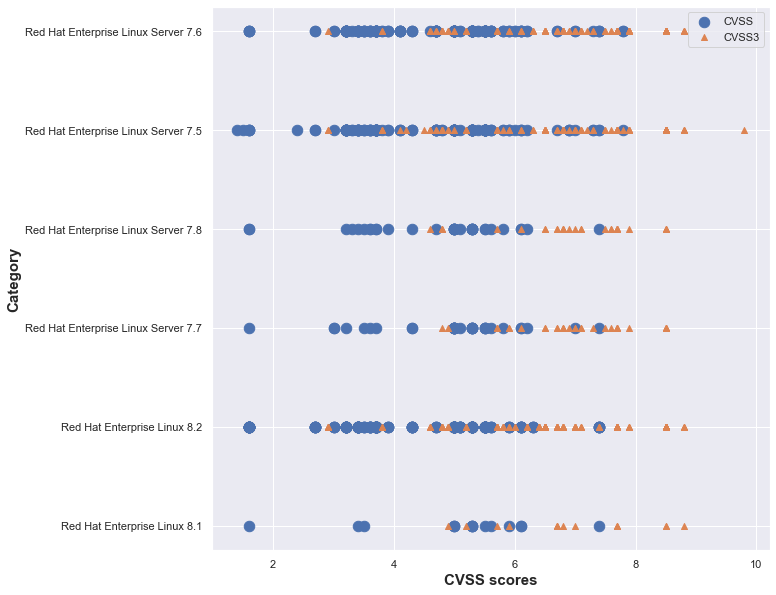

In [66]:
plt.scatter(x=data_redhat['CVSS'],y=data_redhat['OS'], s=110,label='CVSS')
plt.scatter(x=data_redhat['CVSS3'],y=data_redhat['OS'] ,marker ="^",label='CVSS3')
plt.legend()
plt.xlabel('CVSS scores',fontweight ='bold', fontsize = 15)
plt.ylabel('Category',fontweight ='bold', fontsize = 15)

Text(0, 0.5, 'O S')

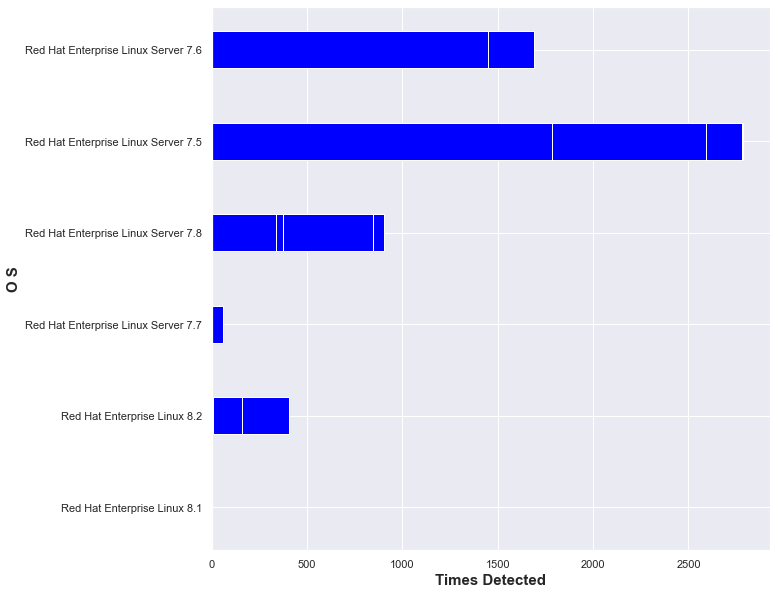

In [67]:
OS=data_redhat['OS']
Times_Detected=data_redhat['Times Detected']
plt.barh(OS, Times_Detected, color ='blue',height=0.4)
plt.xlabel('Times Detected',fontweight ='bold', fontsize = 15)
plt.ylabel('O S',fontweight ='bold', fontsize = 15)

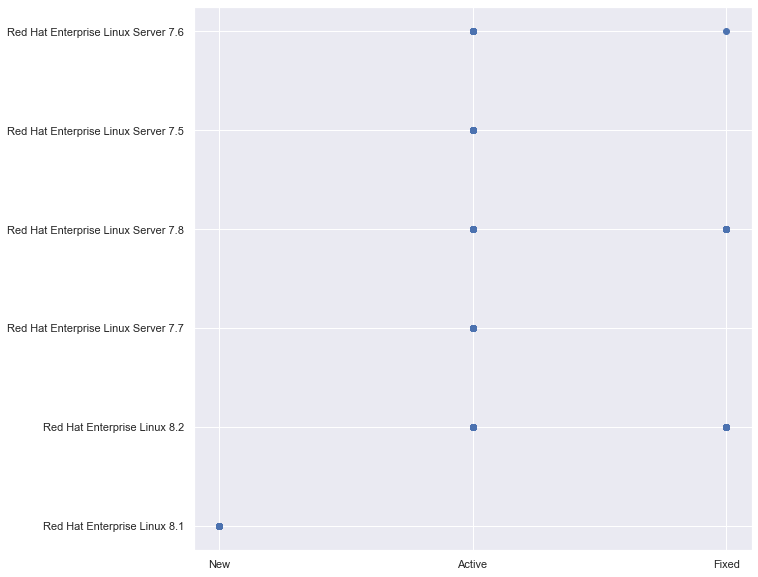

In [68]:
plt.scatter(x=data_redhat['Vuln Status'] ,y=data_redhat['OS'])

# Observation:-
## 1) Red Hat Enterprise Linux Server 7.5 is satisfying all the criteria to be considered Highly vulnerable and can be considered the most critical staged OS in RedHat category

## 2) Red Hat Enterprise Linux Server 7.5 is the most detected and high is CVSS score in the High to critical range. Its vulnerability status is still active and has not been fixed


### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Red Hat Enterprise Linux Server 7.6

In [69]:
mask = (data_redhat['OS'] == 'Red Hat Enterprise Linux Server 7.6') & (data_redhat['Severity'] >= 3) & (data_redhat['CVSS'] >= 7) 
 
# new dataframe with selected rows
data_redhat_d1 = pd.DataFrame(data_redhat[mask])

In [70]:
print(data_redhat_d1[['First Detected','Last Detected','Times Detected','Times Reopened','Associated Malware','Exploitability']])

          First Detected       Last Detected  Times Detected  Times Reopened  \
1914 2019-11-01 03:09:40 2020-02-05 02:22:05             397             NaN   
1945 2019-08-12 23:35:51 2020-02-05 02:22:05             727             NaN   
2174 2020-02-08 01:44:23 2020-09-24 02:30:52             734             NaN   
2185 2019-11-01 02:27:42 2020-02-26 14:32:16             432             NaN   
2197 2019-07-02 20:10:46 2020-09-24 02:30:52            1578             NaN   
2235 2019-08-13 02:37:34 2020-09-24 02:30:52            1425             NaN   

     Associated Malware                                     Exploitability  
1914                NaN  Source: The Exploit-DB_x000D_\nReference:CVE-2...  
1945                NaN  Source: The Exploit-DB_x000D_\nReference:CVE-2...  
2174                NaN                                                NaN  
2185                NaN  Source: The Exploit-DB_x000D_\nReference:CVE-2...  
2197                NaN  Source: The Exploit-DB_x000D_

In [71]:
print(data_redhat_d1[['Severity','CVSS','CVSS3','Vuln Status','PCI Vuln','CVSS Base','CVSS Temporal']])

      Severity  CVSS  CVSS3 Vuln Status PCI Vuln  \
1914         4   7.0    7.9      Active      yes   
1945         3   7.8    8.8      Active      yes   
2174         4   7.4    8.5      Active      yes   
2185         4   7.0    7.9       Fixed      yes   
2197         4   7.3    7.7      Active      yes   
2235         3   7.8    8.8      Active      yes   

                             CVSS Base           CVSS Temporal  
1914    9 (AV:N/AC:L/Au:S/C:C/I:C/A:C)    7 (E:POC/RL:OF/RC:C)  
1945   10 (AV:N/AC:L/Au:N/C:C/I:C/A:C)  7.8 (E:POC/RL:OF/RC:C)  
2174   10 (AV:N/AC:L/Au:N/C:C/I:C/A:C)    7.4 (E:U/RL:OF/RC:C)  
2185    9 (AV:N/AC:L/Au:S/C:C/I:C/A:C)    7 (E:POC/RL:OF/RC:C)  
2197  9.3 (AV:N/AC:M/Au:N/C:C/I:C/A:C)  7.3 (E:POC/RL:OF/RC:C)  
2235   10 (AV:N/AC:L/Au:N/C:C/I:C/A:C)  7.8 (E:POC/RL:OF/RC:C)  


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Red Hat Enterprise Linux Server 7.5

In [72]:
mask = (data_redhat['OS'] == 'Red Hat Enterprise Linux Server 7.5') & (data_redhat['Severity'] >= 3) & (data_redhat['CVSS'] >= 7) 
 
# new dataframe with selected rows
data_redhat_d2 = pd.DataFrame(data_redhat[mask])

In [73]:
print(data_redhat_d2[['First Detected','Last Detected','Times Detected','Times Reopened','Associated Malware','Exploitability']])

          First Detected       Last Detected  Times Detected  Times Reopened  \
1770 2020-02-08 02:29:04 2020-09-24 02:04:13             776             NaN   
1780 2019-11-01 03:07:48 2020-09-24 02:04:13            1180             NaN   
1792 2019-07-02 12:10:51 2020-09-24 02:04:13            1663             NaN   
1819 2019-05-23 19:17:06 2020-09-24 02:04:13            1783             NaN   
1852 2019-08-13 00:05:59 2020-09-24 02:04:13            1501             NaN   

     Associated Malware                                     Exploitability  
1770                NaN                                                NaN  
1780                NaN  Source: The Exploit-DB_x000D_\nReference:CVE-2...  
1792                NaN  Source: The Exploit-DB_x000D_\nReference:CVE-2...  
1819                NaN  Source: Metasploit_x000D_\nReference:CVE-2018-...  
1852                NaN  Source: The Exploit-DB_x000D_\nReference:CVE-2...  


In [74]:
print(data_redhat_d2[['Severity','CVSS','CVSS3','Vuln Status','PCI Vuln','CVSS Base','CVSS Temporal']])

      Severity  CVSS  CVSS3 Vuln Status PCI Vuln  \
1770         4   7.4    8.5      Active      yes   
1780         4   7.0    7.9      Active      yes   
1792         4   7.3    7.7      Active      yes   
1819         4   7.3    7.0      Active      yes   
1852         3   7.8    8.8      Active      yes   

                             CVSS Base           CVSS Temporal  
1770   10 (AV:N/AC:L/Au:N/C:C/I:C/A:C)    7.4 (E:U/RL:OF/RC:C)  
1780    9 (AV:N/AC:L/Au:S/C:C/I:C/A:C)    7 (E:POC/RL:OF/RC:C)  
1792  9.3 (AV:N/AC:M/Au:N/C:C/I:C/A:C)  7.3 (E:POC/RL:OF/RC:C)  
1819  9.3 (AV:N/AC:M/Au:N/C:C/I:C/A:C)  7.3 (E:POC/RL:OF/RC:C)  
1852   10 (AV:N/AC:L/Au:N/C:C/I:C/A:C)  7.8 (E:POC/RL:OF/RC:C)  


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Severity == 5

In [75]:
# condition mask
mask = data_redhat['Severity'] == 5
 
# new dataframe with selected rows
data_redhat_S5 = pd.DataFrame(data_redhat[mask])
 
print(data_redhat_S5)

         masked Ip                 Network Tracking Method  \
1733  lab_2_IP9011  Global Default Network          QAGENT   
1734  lab_2_IP9011  Global Default Network          QAGENT   

                                       OS                 IP Status     QID  \
1733  Red Hat Enterprise Linux Server 7.5  host scanned, found vuln  237142   
1734  Red Hat Enterprise Linux Server 7.5  host scanned, found vuln  237055   

                                                  Title Vuln Status  Type  \
1733  Red Hat Update for java-1.8.0-ibm (RHSA-2019:0...      Active  Vuln   
1734  Red Hat Update for java-1.8.0-ibm (RHSA-2018:3...      Active  Vuln   

      Severity  ...       CVSS3 Temporal  \
1733         5  ...  8.5 (E:U/RL:O/RC:C)   
1734         5  ...  7.8 (E:U/RL:O/RC:C)   

                                                 Threat  \
1733  IBM Java SE version 8 includes the IBM Java Ru...   
1734  IBM Java SE version 8 includes the IBM Java Ru...   

                                

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### CVSS3 > 9      ( RedHat OS )

In [76]:
# condition mask
mask = data_redhat['CVSS3'] >= 9
 
# new dataframe with selected rows
data_redhat_cvss7 = pd.DataFrame(data_redhat[mask])
 
print(data_redhat_cvss7)

         masked Ip                 Network Tracking Method  \
1817  lab_2_IP9011  Global Default Network          QAGENT   

                                       OS                 IP Status     QID  \
1817  Red Hat Enterprise Linux Server 7.5  host scanned, found vuln  237065   

                                                  Title Vuln Status  Type  \
1817  Red Hat Update for NetworkManager (RHSA-2018:3...      Active  Vuln   

      Severity  ...       CVSS3 Temporal  \
1817         4  ...  9.8 (E:X/RL:X/RC:X)   

                                                 Threat  \
1817  NetworkManager is a system network service tha...   

                                                 Impact  \
1817  On successful exploitation it could allow an a...   

                                               Solution Exploitability  \
1817  Upgrade to the latest packages which contain a...            NaN   

      Associated Malware PCI Vuln OS CPE Category  Non-running Kernel  
1817         

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# CVSS > 9 (critical)

## Now we finally consider the OS and Categories with CVSS score above 9 (Critical) 

In [77]:
data_cvss = data.loc[(data['CVSS'] >= 9) & (data['CVSS3'] >= 9)]
print(data_cvss)
data_cvss.describe()

          masked Ip                 Network Tracking Method  \
12229  lab_2_IP7752  Global Default Network              IP   
15293  lab_2_IP7380  Global Default Network              IP   
16501  lab_2_IP7264  Global Default Network              IP   
27465  lab_2_IP5807  Global Default Network              IP   
38405  lab_2_IP4424  Global Default Network              IP   
45042  lab_2_IP3533  Global Default Network              IP   
45043  lab_2_IP3533  Global Default Network              IP   
45057  lab_2_IP3532  Global Default Network              IP   
45058  lab_2_IP3532  Global Default Network              IP   
47937  lab_2_IP2992  Global Default Network              IP   
53921  lab_2_IP2178  Global Default Network              IP   
69350    lab_2_IP87  Global Default Network              IP   

                                                      OS  \
12229  EulerOS / Ubuntu / Fedora / Tiny Core Linux / ...   
15293  EulerOS / Ubuntu / Fedora / Tiny Core Linux / ...   


,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,12.000000,12.000000,9.000000,12.000000,2.0,12.000000,12.000000
mean,24860.583333,4.250000,5371.666667,27.666667,2.0,9.166667,9.391667
std,22719.100724,0.965307,4862.124973,31.904213,0.0,0.389249,0.296827
min,11950.000000,3.000000,80.000000,1.000000,2.0,9.000000,9.000000
25%,11950.000000,3.000000,443.000000,1.000000,2.0,9.000000,9.300000
50%,13687.000000,5.000000,9100.000000,9.500000,2.0,9.000000,9.300000
75%,20776.500000,5.000000,9100.000000,67.000000,2.0,9.000000,9.300000
max,70077.000000,5.000000,10000.000000,71.000000,2.0,10.000000,10.000000


In [78]:
data_cvss['OS'].describe() # we can see we have 6 OS with critical CVSS score 


count                                                    12
unique                                                    6
top       EulerOS / Ubuntu / Fedora / Tiny Core Linux / ...
freq                                                      4
Name: OS, dtype: object

In [79]:
# Lets start plotting 
# 1. plotting of OS vs cvss 
# 2. plotting of times detected vs OS
# 3. plotting of pair plot

In [80]:

# plotting of OS vs CVSS


Text(0, 0.5, 'O S')

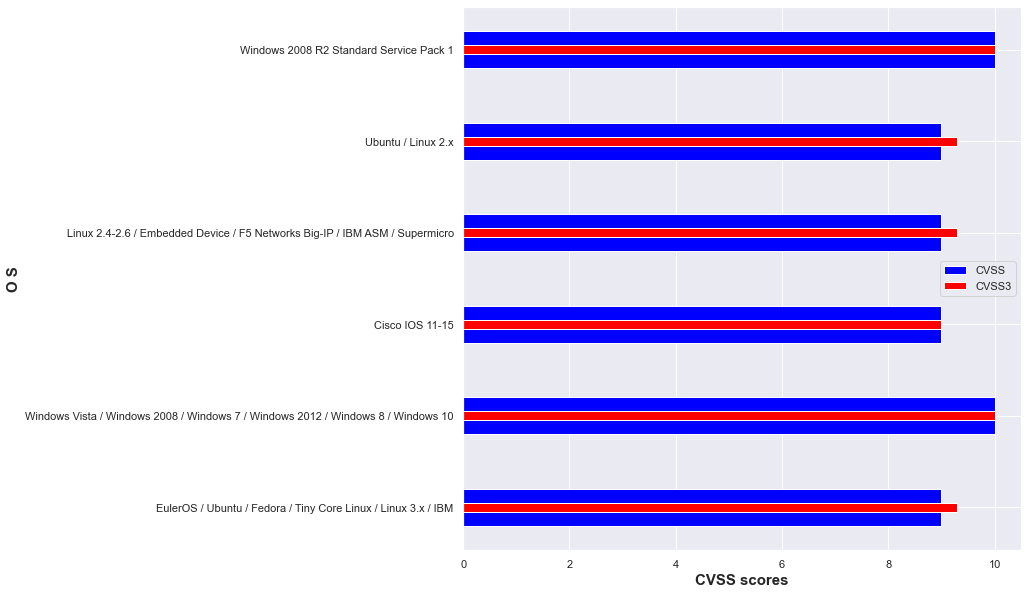

In [81]:
OS=data_cvss['OS']
CVSS=data_cvss['CVSS']
CVSS3=data_cvss['CVSS3']
plt.barh(OS, CVSS, color ='blue',height=0.4,label='CVSS')
plt.barh(OS, CVSS3, color ='red',height=0.1,label='CVSS3')
plt.legend()
#plt.xticks(rotation=90)
plt.xlabel('CVSS scores',fontweight ='bold', fontsize = 15)
plt.ylabel('O S',fontweight ='bold', fontsize = 15)


In [82]:
# plotting of Time Dectected vs OS

Text(0, 0.5, 'O S')

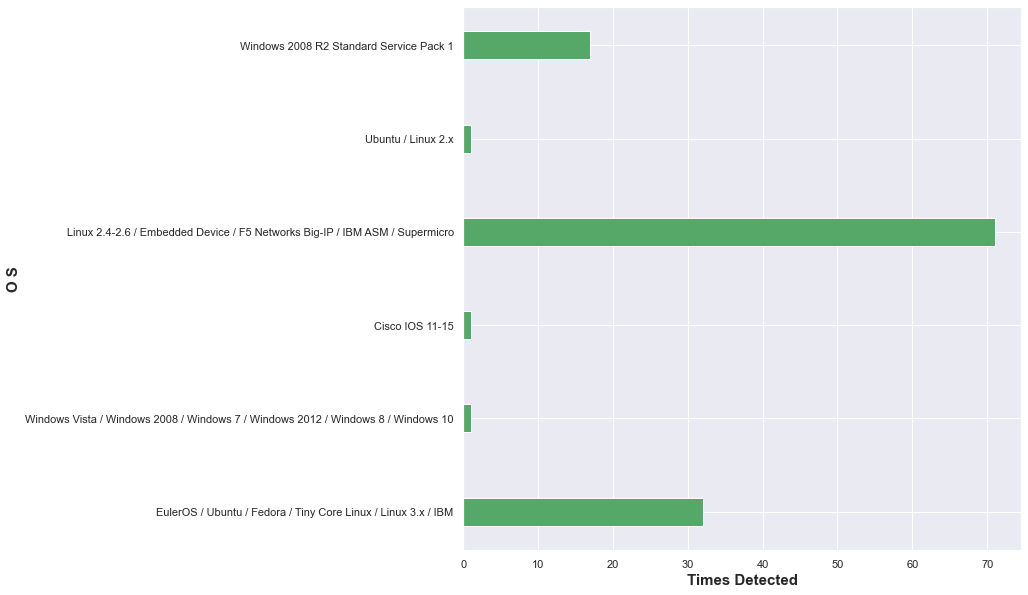

In [83]:

x=data_cvss['OS'].tolist()
y=data_cvss['Times Detected'].tolist()
Times=data_cvss['Times Detected']
plt.barh(x, y, color ='g',height=0.3,label='CVSS')

plt.xlabel('Times Detected',fontweight ='bold', fontsize = 15)
plt.ylabel('O S',fontweight ='bold', fontsize = 15)



<AxesSubplot:xlabel='Vuln Status', ylabel='Count'>

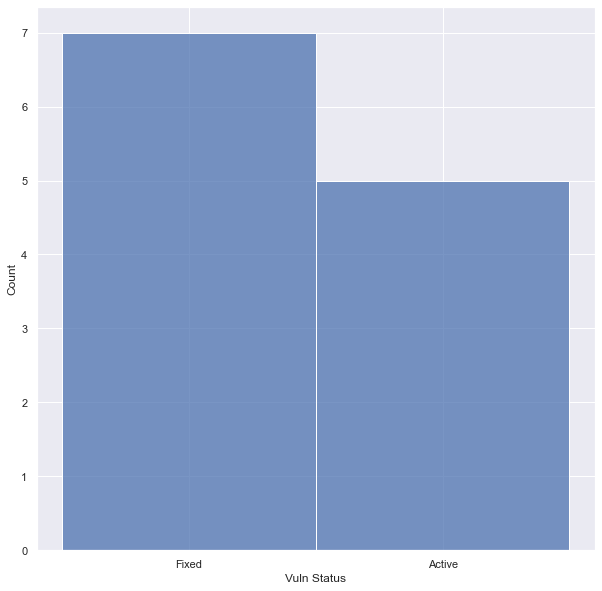

In [84]:
sns.histplot(data = data_cvss, x = "Vuln Status")